In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
ds= xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc")
ds

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

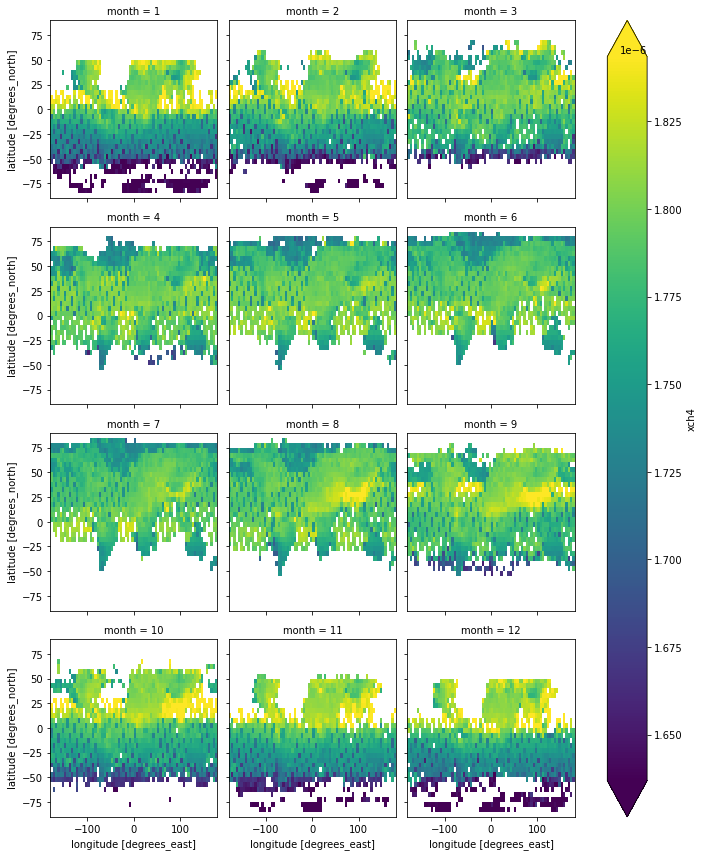

In [13]:
# 1.1
ds.xch4.groupby('time.month').mean().plot(col="month", col_wrap=3, robust=True)

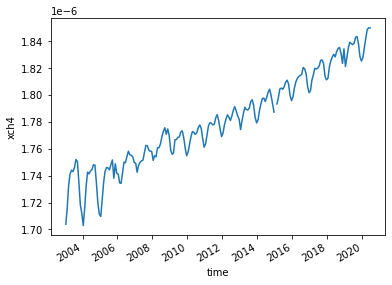

In [15]:
# 1.2
ds.xch4.sel(time=slice('2003-01','2020-06')).mean(dim=['lon','lat']).plot()

D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


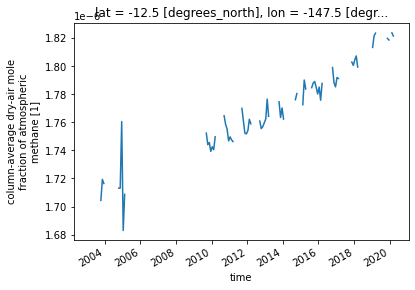

In [17]:
# 1.3
ds.xch4.sel(time=slice('2003-01','2020-06')).sel(lon=-150,lat=-15,method='nearest').plot()

In [119]:
# 2.1
ds_2= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
ds_2

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

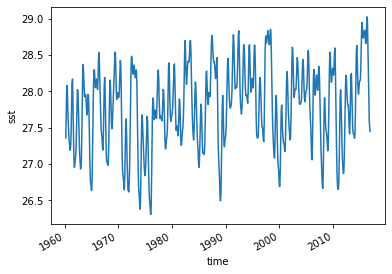

In [131]:
ds_2.sst.sel(lon=['190','240'],lat=['-6','6']).rolling(time=3).mean().mean(dim=['lon','lat']).plot()

In [137]:
subtract=ds_2.sst.sel(lon=['190','240'],lat=['-6','6']).rolling(time=3).mean()-ds_2.sst.sel(lon=['190','240'],lat=['-6','6']).mean()
subtract

<xarray.DataArray 'sst' (time: 684, lat: 2, lon: 2)>
array([[[        nan,         nan],
        [        nan,         nan]],

       [[        nan,         nan],
        [        nan,         nan]],

       [[ 0.8321419 , -1.4950333 ],
        [-0.40036774, -0.64657974]],

       ...,

       [[ 1.2160168 , -2.6099186 ],
        [ 1.3334293 , -0.7062893 ]],

       [[ 1.2324429 , -2.6276512 ],
        [ 1.1617756 , -0.912426  ]],

       [[ 1.2956429 , -2.4825268 ],
        [ 0.8325443 , -0.99769783]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -6.0 6.0
  * lon      (lon) float32 190.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

In [139]:
# 2.2
ds2_2=subtract.mean(dim=['lat', 'lon'])
ds2_2=ds2_2.to_dataframe()

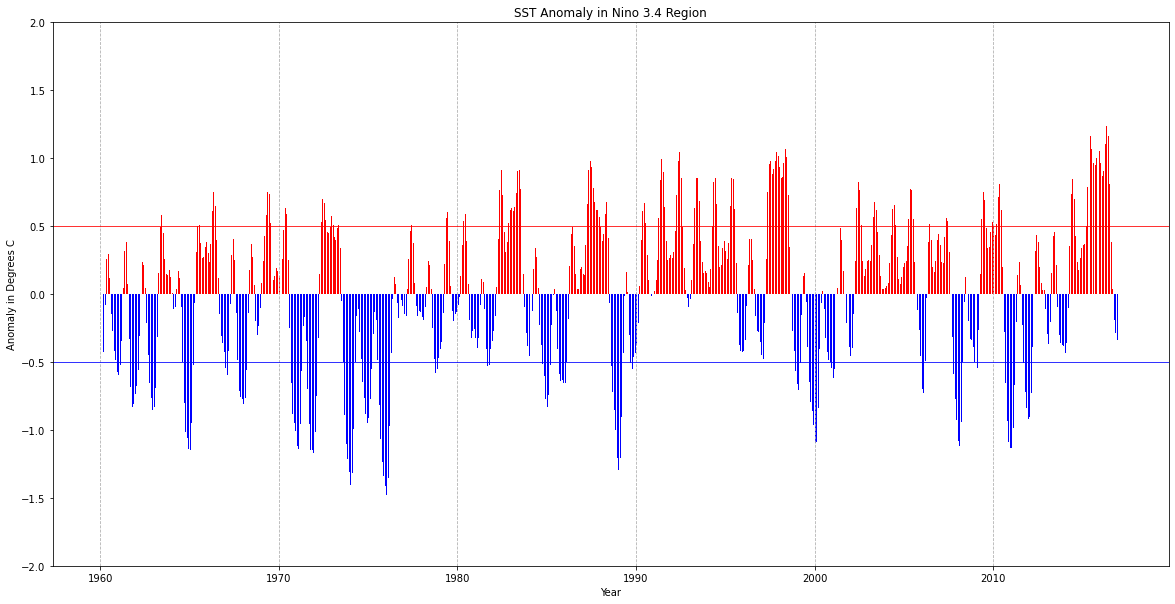

In [144]:
# ds2_2['sign']=ds2_2['sst'] > 0
fig, ax = plt.subplots(figsize=(20, 10))
ax.yaxis.set_ticks_position('left')
ax.set(title = 'SST Anomaly in Nino 3.4 Region',
       xlabel = 'Year',
       ylabel = 'Anomaly in Degrees C')
ax.bar(ds2_2.index, ds2_2['sst'],width=20,
       color=ds2_2.sign.map({True: 'r', False: 'b'}))
ax.grid(ls = 'dashed', axis = 'x')
ax.set_ylim(-2.0,2.0)
ax.axhline(0.5,linewidth=0.8,color='red')
ax.axhline(-0.5,linewidth=0.8,color='blue')

In [147]:
#3.1
ds_3= xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc")
ds_3

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

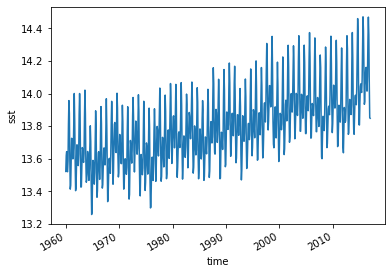

In [149]:
ds_3.sst.mean(dim=['lon','lat']).plot()

Text(0.5, 1.0, 'Global SST Mean')

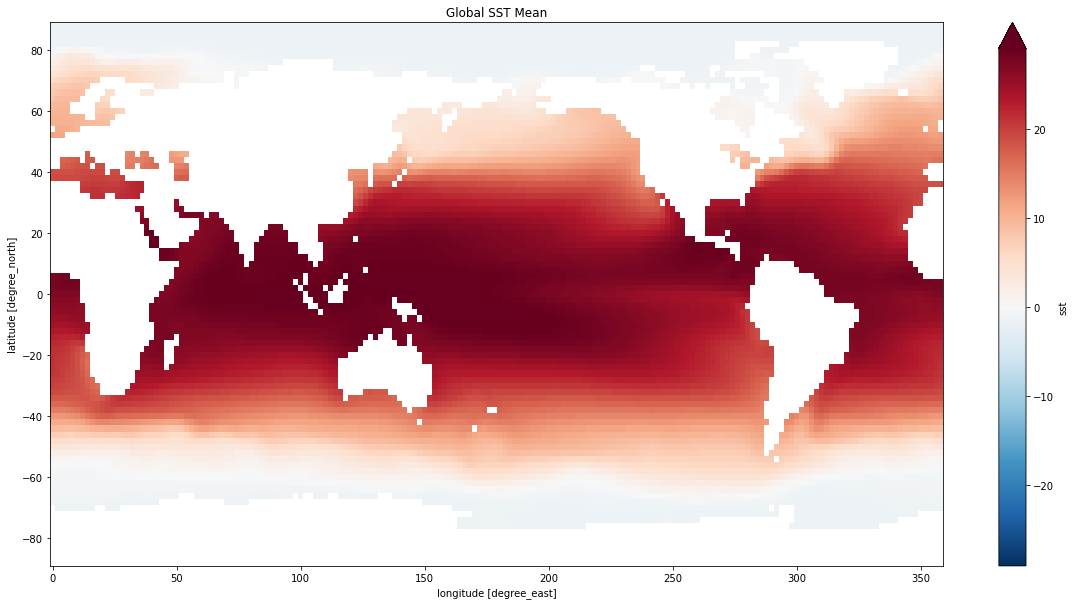

In [153]:
# 3.2
ds_3.sst.mean(dim=['time']).plot(robust=True, figsize=(20, 10))
plt.title('Global SST Mean')

Text(0.5, 1.0, 'All-Time Averaged SST in a Certain Region')

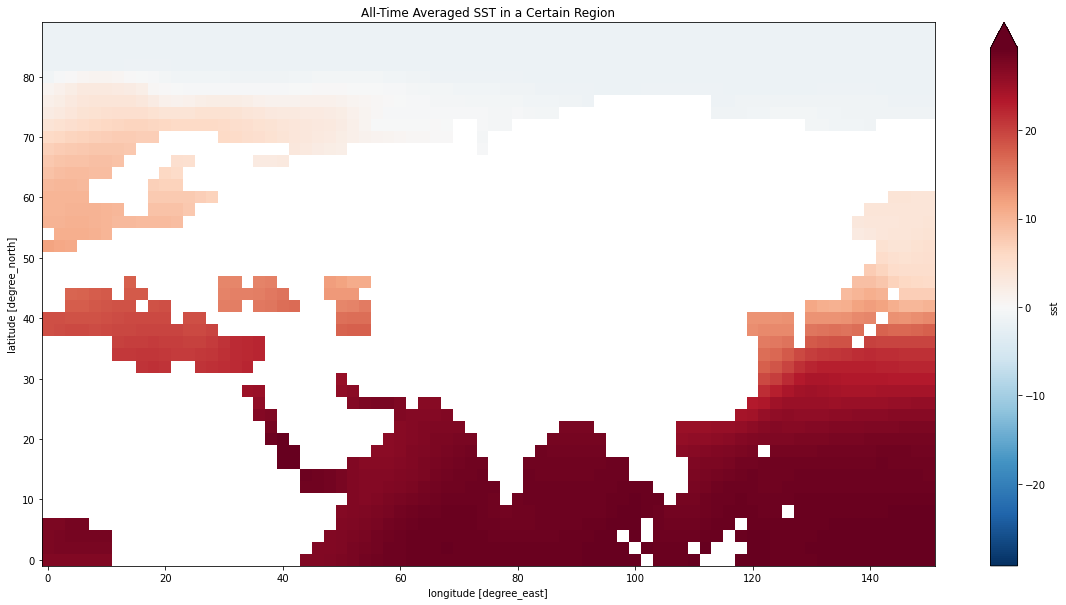

In [154]:
ds_3.sst.mean(dim=['time']).sel(lon=slice(0,150),lat=slice(0,100)).plot(robust=True, figsize=(20, 10))
plt.title('All-Time Averaged SST in a Certain Region')

D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Text(0.5, 1.0, 'Climatology of SST in certain point')

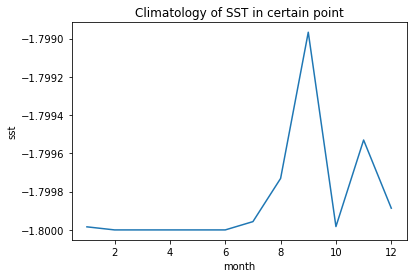

In [160]:
ds_3.sst.groupby('time.month').mean().sel(lon=20, lat=100, method='nearest').plot()
plt.title('Climatology of SST in certain point')

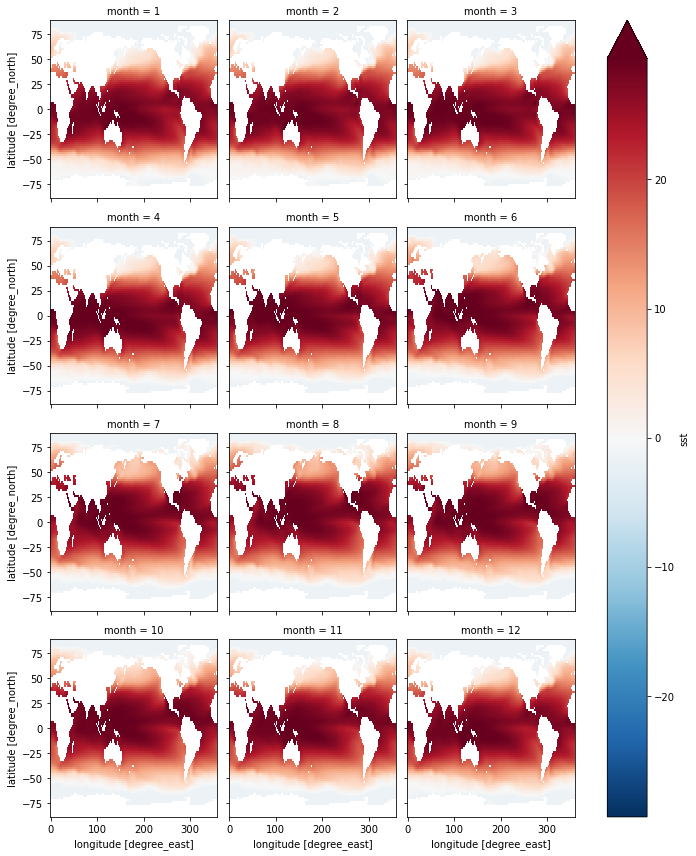

In [164]:
ds_3.sst.groupby('time.month').mean().plot(col="month", col_wrap=3, robust=True)

D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Text(0.5, 1.0, 'Fig. 4 Anomalies of Precipitation in Jinzhou')

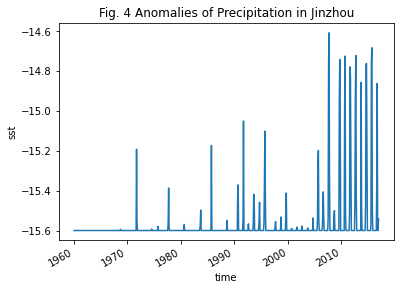

In [170]:
 
# ds_3.sst.sel(lon=100,lat=150,method='nearest').plot()
subtract=ds_3.sst-ds_3.sst.mean()
subtract.sel(lon=130,lat=80,method='nearest').plot()
plt.title('Fig. 4 Anomalies of Precipitation in Jinzhou')